In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [16]:
global NumSpecies,mu0,lambdaa,gamma,D,eta,kappa,NumMGE,Mp

In [17]:
def MultiSpecies(t,y):
    dydt=np.zeros(NumSpecies*(1+NumMGE))
    for i in range(NumSpecies):
        ss=1
        for j in range(NumMGE):
            ss=ss*(1+lambdaa[i,j]*y[NumSpecies+i*NumMGE+j]/y[i])
        dydt[i]=mu0[i]*y[i]*ss*(1-(gamma*sum(y[range(NumSpecies)])-gamma*y[i]+y[i]))-D*y[i]
        for j in range(NumMGE):
            if Mp[j]==i:
                dydt[NumSpecies+i*NumMGE+j]=dydt[i]
            else:
                ss=1
                for k in range(NumMGE):
                    if k!=j:
                        ss=ss*(1+lambdaa[i,k]*y[NumSpecies+i*NumMGE+k]/y[i])
                donor=0
                for k in range(NumSpecies):
                    donor=donor+y[NumSpecies+k*NumMGE+j]
                dydt[NumSpecies+i*NumMGE+j]=mu0[i]*y[NumSpecies+i*NumMGE+j]*ss*(1+lambdaa[i,j])*(1-(gamma*sum(y[range(NumSpecies)])-gamma*y[i]+y[i]))+eta*(y[i]-y[NumSpecies+i*NumMGE+j])*donor-(kappa+D)*y[NumSpecies+i*NumMGE+j]
    return dydt

In [18]:
mu00=0.5
NumSpecies=3
NumMGEs=np.multiply([1,2,3],NumSpecies)
repeat=500
etas=np.arange(0,0.5,0.1)
CoexistProb=np.zeros((len(NumMGEs),len(etas)))
thresh=0.01
gamma=0.9
kappa=0.005 
D=0.2
timespan=np.arange(0,200.1,0.1)

In [19]:
for sdfa in range(len(NumMGEs)):
    NumMGE=NumMGEs[sdfa]
    richness=np.zeros((len(etas),repeat))
    for i in range(len(etas)):
        print(i)
        eta=etas[i]
        Mp=np.zeros(NumMGE)
        for ii in range(NumMGE):
            Mp[ii]=(ii+1)%NumSpecies-1
            if Mp[ii]==-1:
                Mp[ii]=NumSpecies-1

        initial=np.zeros((NumSpecies*NumMGE+NumSpecies))
        for ii in range(NumSpecies):
            initial[ii]=1/NumSpecies
            for j in range(NumMGE):
                if Mp[j]==ii:
                    initial[NumSpecies+ii*NumMGE+j]=initial[ii]
                else:
                    initial[NumSpecies+ii*NumMGE+j]=0

        for hjk in range(repeat):
            lambdaa=np.zeros((NumSpecies,NumMGE))
            mu=np.multiply(mu00,0.5+1*np.random.rand(NumSpecies))
            mu0=mu
            TTT=np.arange(0,NumMGE,1)
            for vbn in range(NumSpecies):
                if sum([1 for x in Mp if x==vbn])>0:
                    tempp=[]
                    for sde in range(len(Mp)):
                        if Mp[sde]==vbn:
                            tempp=np.append(tempp,TTT[sde])
                    #tempp=TTT(Mp==vbn);
                    nnnn = len(tempp)
                    
                    for rty in range(len(tempp)):
                        lambdaa[:,int(tempp[rty])]=(mu[vbn]/mu00)**(1/3)-1
                        zxc=(mu[vbn]/mu00)**(1/3)-1
                    mu0[vbn]=mu[vbn]/(1+zxc)**nnnn

            sol=solve_ivp(MultiSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
            y=np.transpose(sol.y)
            temp=y[-1,range(NumSpecies)]
            temp=np.divide(temp,sum(temp))
            richness[i,hjk]=sum(y[-1,range(NumSpecies)]>thresh)
        CoexistProb[sdfa,i]=sum(richness[i,:]==NumSpecies)/repeat

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


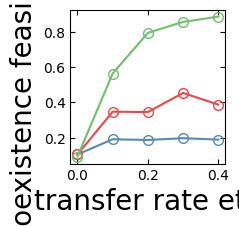

In [20]:
plt.figure(figsize=(2,2))
for i in range(len(NumMGEs)):
    if i==0:
        plt.plot(etas,CoexistProb[i,:],'o-',markersize=7,fillstyle='none',color=(0.3467,0.5360,0.6907))
    if i==1:
        plt.plot(etas,CoexistProb[i,:],'o-',markersize=7,fillstyle='none',color=(0.9153,0.2816,0.2878))
    if i==2:
        plt.plot(etas,CoexistProb[i,:],'o-',markersize=7,fillstyle='none',color=(0.4416,0.7490,0.4322))
plt.xlabel('transfer rate eta',fontsize=20)
plt.ylabel('coexistence feasibility',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('Species3.pdf')
plt.show()
import pandas as pd
df=pd.DataFrame(CoexistProb)
df.to_csv("Species3.csv")